In [1]:
import os,sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
dicti = {'A':0,'N':0,'C':0,'Q':0,'G':0,'I':0,'L':0,'M':0,'F':0,'P':0,'S':0,'T':0,'W':0,'Y':0,'V':0,'H':0,'K':1,'R':1,'D':-1,'E':-1}


In [3]:
A8 = pd.read_csv('../multimutant/A8out100Msteps.traj',delim_whitespace=True)
A13 = pd.read_csv('../multimutant/A13out100Msteps.traj',delim_whitespace=True)
A18 = pd.read_csv('../multimutant/A18out100Msteps.traj',delim_whitespace=True)

# Plot f(s)

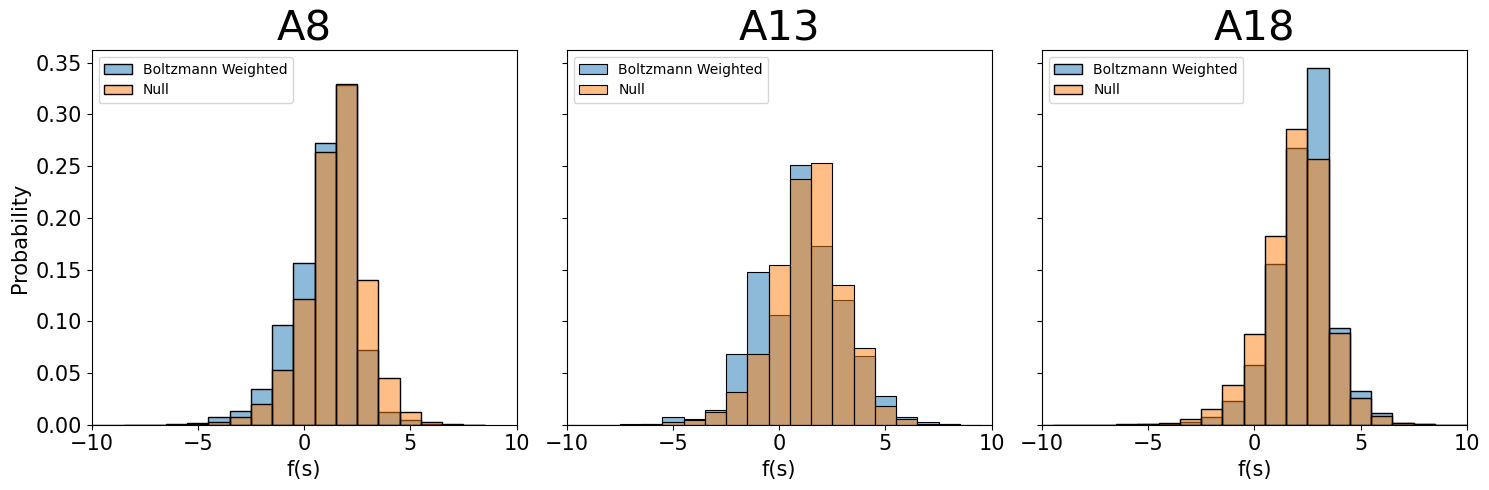

In [4]:
fig,axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
plt.rcParams.update({'font.size': 10})
titles = ['A8','A13','A18']
for i,df in enumerate([A8,A13,A18]):
    ax = axes.flat[i]
    beta = 0.593**-1
    weights = np.nan_to_num(np.exp(-beta*df['energy']),nan=0)
    vals = df['N_pm']-df['N_mm']-df['N_pp']
    null = df[df['k']==5]['N_pm']-df[df['k']==5]['N_mm']-df[df['k']==5]['N_pp']
    hbins=np.arange(-5,10)
    ax.set_title(titles[i],fontsize=30)
    sns.histplot(x=vals,discrete=True,weights=weights,ax=ax,alpha=0.5,stat='probability',label='Boltzmann Weighted')
    sns.histplot(x=null,discrete=True,weights = sum(null)**-1 * np.ones(len(null)),alpha=0.5,stat='probability',ax=ax,label='Null')
    hist1=np.histogram(vals,weights=weights,bins=hbins)
    hist2=np.histogram(null,bins=hbins)
    """
    mean = int(np.average(vals,weights=weights))
    idx = int(np.argwhere(hist1[1]==mean))
    p = np.sum(hist2[0][idx:])/np.sum(hist2[0])
    """
    ax.set_xlabel('f(s)',fontsize=15)
    ax.set_xlim(-10,10)
    #ax.text(-9,0.3,f'p-value = {np.around(p,2)}')
    # Set the font size for x and y ticks and labels
    ax.tick_params(axis='both',labelsize=15)  # Adjust the font size of x ticks
    ax.set_ylabel('Probability', fontsize=15)
    ax.legend(loc='upper left')
fig.tight_layout()
fig.savefig('saltbridges_hist_figure11.pdf',dpi=300)
#plt.hist(df2, bins=50)

# Plot Ensemble Distributions

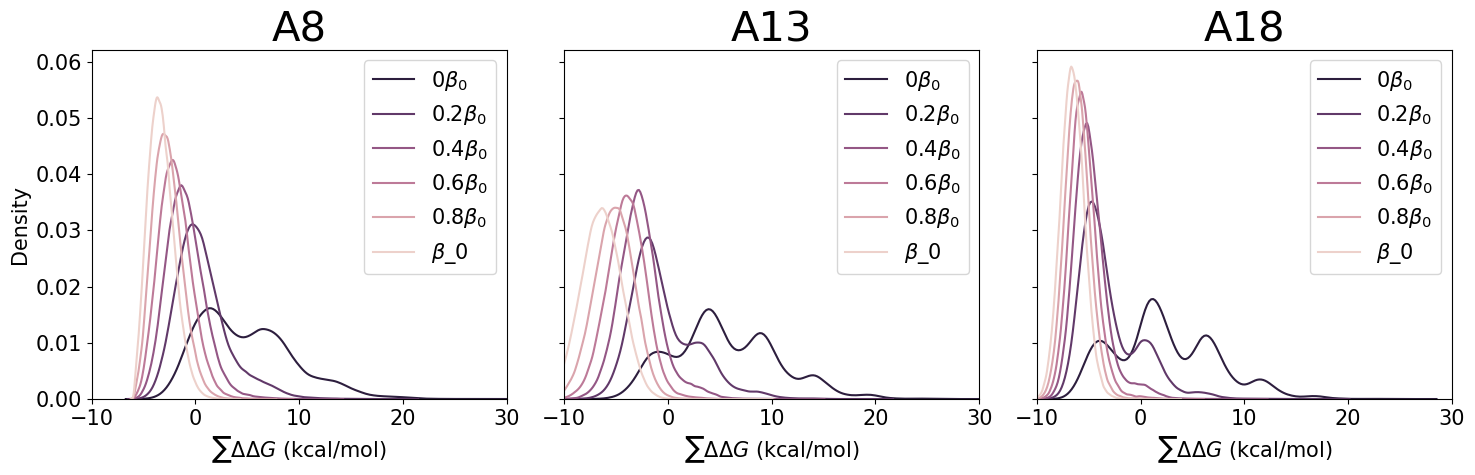

In [6]:
fig,axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
plt.rcParams.update({'font.size': 15})
titles = ['A8','A13','A18']
for i,df in enumerate([A8,A13,A18]):
    ax = axes.flat[i]
    ax.set_title(titles[i],fontsize=30)
    sns.kdeplot(data=df,x='energy',hue='k',ax=ax)
    ax.set_xlim(-10,30)
    ax.set_xlabel('$\sum \Delta \Delta G$ (kcal/mol)', fontsize=15)
    ax.tick_params(axis='both',labelsize=15)  # Adjust the font size of x ticks
    ax.set_ylabel('Density', fontsize=15)
    ax.legend(labels=np.flip([r"$\beta$_0",r"$0.8\beta_0$",r"$0.6 \beta_0$",r"$0.4 \beta_0$",r"$0.2 \beta_0$",r"$0\beta_0$"]))
fig.tight_layout()
fig.savefig('Ensemble_sampling_figure11.pdf',dpi=300)


